# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights


In [115]:
import pandas as pd
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

**PART 1:** Understanding Product Categories

In [ ]:
df = pd.read_csv('C:/Users/faval/Desktop/Ironhack/DataAnalytics/week5/day1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv')

In [47]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

**1. Frequency Tables:**

In [ ]:
unique_categories = df['category'].unique()
print(unique_categories)

In [ ]:
frequency_table = df['category'].value_counts()
print(frequency_table)

In [ ]:
top5_categories = df['category'].value_counts().head(5)
print(top5_categories)

**2. Visualizations:**

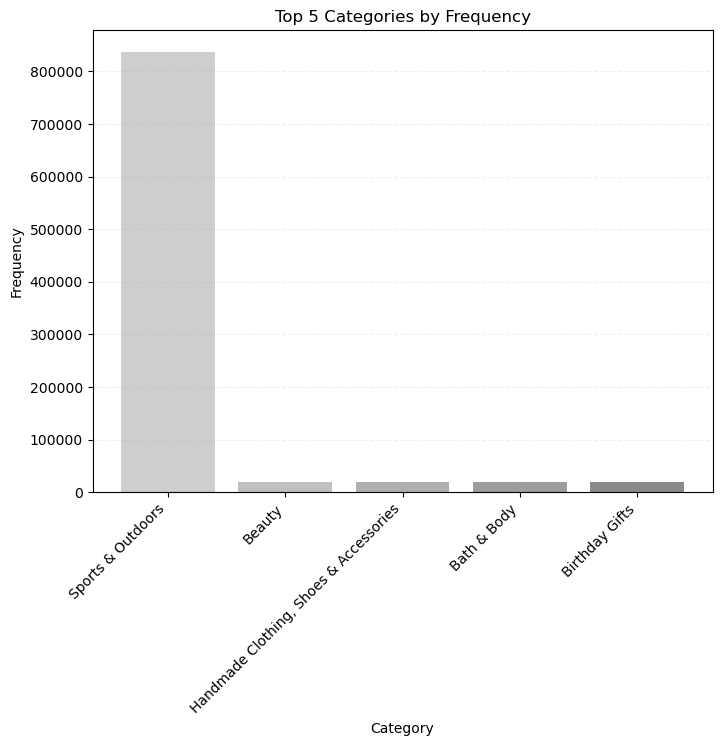

In [18]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
cmap = plt.colormaps['Greys']  # Access the 'Greys' colormap
colors = [cmap(0.3 + (0.3 * (i / len(top5_categories.index)))) for i in range(len(top5_categories.index))]
plt.bar(top5_categories.index, top5_categories.values, color=colors)  # Create the bar chart
plt.title('Top 5 Categories by Frequency')  # Add a title
plt.xlabel('Category')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.2) # show grid
plt.show()

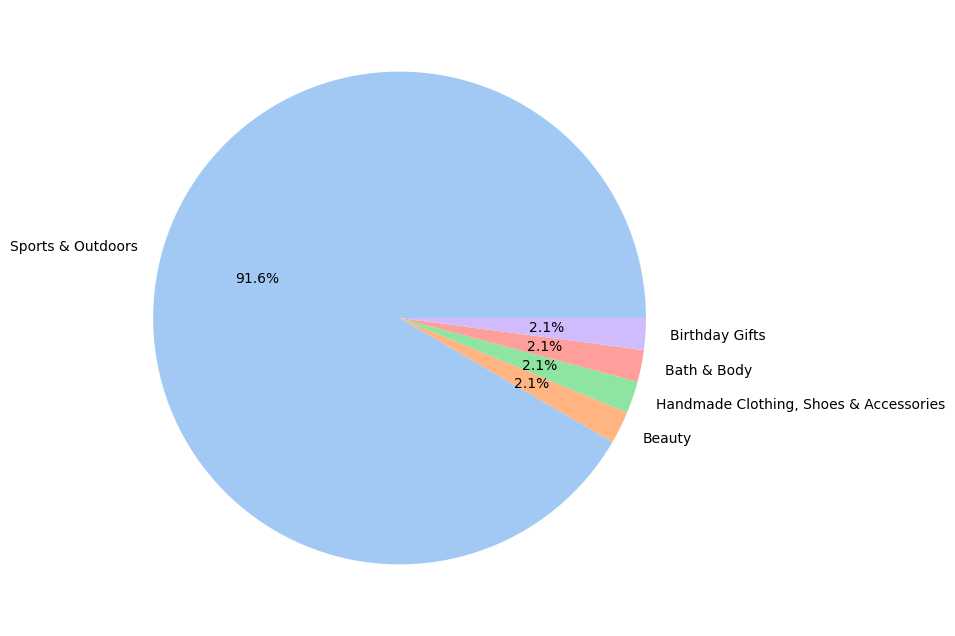

In [24]:
plt.figure(figsize=(8, 8)) 
plt.pie(top5_categories.values, labels=top5_categories.index, colors=sns.color_palette("pastel"), autopct='%1.1f%%', startangle=0);

Sports & Outdoors with te 91.6% of values dominates the "Category" listing          

**PART 2:** Delving into Product Pricing

**1. Measures of Centrality:**

In [49]:
centrality = [df["price"].mean(), df["price"].median(), df["price"].mode().iloc[0]]  # use .iloc[0] for the first mode value
stat_labels = ["Mean", "Median", "Mode"]
df_centrality = pd.DataFrame({'Centrality': stat_labels,'Value': centrality})
df_centrality

,Centrality,Value
0,Mean,89.243809
1,Median,19.090000
2,Mode,9.990000


The mean is nearly 9 times greater than the mode, indicating that there are a few items with significantly higher prices compared to the majority. This disparity is further highlighted by the median, where the mean exceeds it by more than 4 times. This demonstrates that the data is heavily skewed by a small number of items with exceptionally high prices.

**2. Measures of Dispersion:**

In [98]:
std = round(df["price"].std(), 2)
var = round(df["price"].var(), 2)
range_val = round(df["price"].max() - df["price"].min(), 2)  # renamed range to range_val to avoid overwriting built-in function
q1 = round(df['price'].quantile(0.25), 2)
q3 = round(df['price'].quantile(0.75), 2)
iqr = round(q3 - q1, 2)

In [100]:
dispersion = [std, var, range, q1, q3, iqr]  # use .iloc[0] for the first mode value
stat_labels = ["Standar Deviation", "Variance", "Range", "Q1", "Q3", "IQR"]
df_dispersion = pd.DataFrame({'Dispersion': stat_labels,'Value': dispersion})
df_dispersion

,Dispersion,Value
0,Standar Deviation,345.61
1,Variance,119445.49
2,Range,100000.00
3,Q1,9.99
4,Q3,45.99
5,IQR,36.00


Are quite varied, range for example shows a 100.000 diffrerence between max and min values. While the overall spread is large, the IQR = 36 suggests that in the central bulk (50%) of the data, prices don't vary as much as the overall range might imply.

**3. Visualizations:**

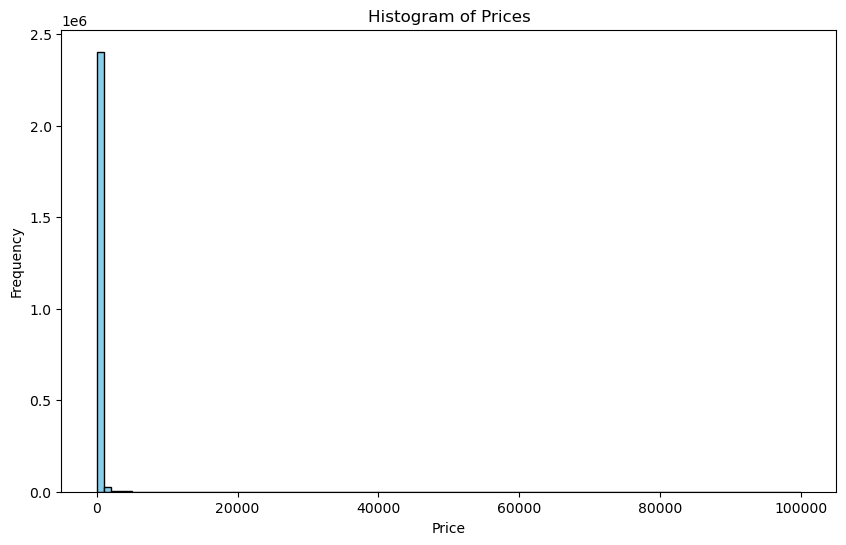

In [32]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')  # Create histogram
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# The dataset is challenging to interpret, as the majority of prices cluster tightly between 0 and 20 €, with a few extreme outliers reaching up to 100,000 €.
# This issue could be addressed by removing these outliers or by categorizing the data into defined price ranges, such as [0-9.99], [10-19.99], [20-29.99], and [30-max].
# These adjustments could enhance clarity and reveal deeper insights into the pricing structure."

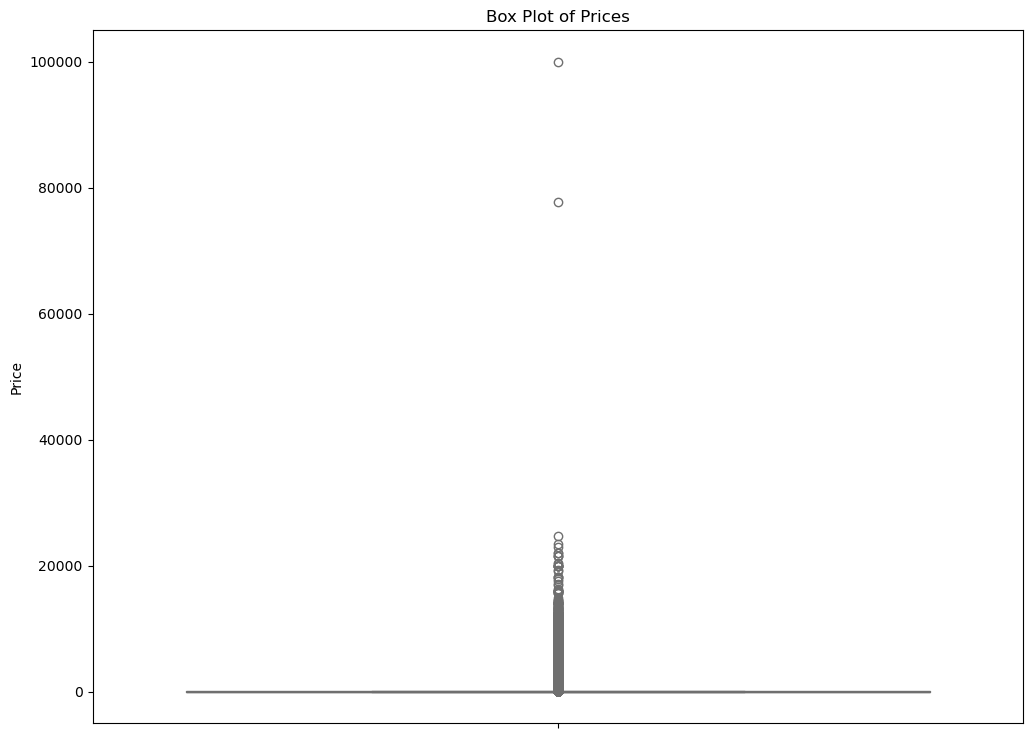

In [38]:
plt.figure(figsize=(12, 9))
sns.boxplot(y=df['price'], color='skyblue')
plt.title('Box Plot of Prices')
plt.ylabel('Price')
plt.show()

**PART 3:** Unpacking Product Ratings

**1. Measures of Centrality:**

In [ ]:
rating_freq = df['stars'].value_counts()
print(rating_freq)

In [95]:
centrality_rating = [df["stars"].mean(), df["stars"].median(), df["stars"].mode().iloc[0]]  # use .iloc[0] for the first mode value
stat_labels = ["Mean", "Median", "Mode"]
df_centrality_rating = pd.DataFrame({'Centrality': stat_labels,'Value': centrality_rating})
df_centrality_rating

,Centrality,Value
0,Mean,2.152836
1,Median,0.000000
2,Mode,0.000000


In [99]:
df_no_zero = df[df['stars'] != 0]
df_no_zero.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [70]:
centrality_rating = [df_no_zero["stars"].mean(), df_no_zero["stars"].median(), df_no_zero["stars"].mode().iloc[0]]  # use .iloc[0] for the first mode value
stat_labels = ["Mean", "Median", "Mode"]
df_centrality_rating_no_zero = pd.DataFrame({'Centrality': stat_labels,'Value': centrality_rating})
df_centrality_rating_no_zero

,Centrality,Value
0,Mean,4.319161
1,Median,4.400000
2,Mode,4.500000


In [ ]:
# When excluding zero values, most product ratings exceed 4 stars, with a median of 4.4 and a mean of 4.3.

**2. Measures of Dispersion:**

In [105]:
std_stars = round(df_no_zero["stars"].std(), 2)
var_stars = round(df_no_zero["stars"].var(), 2)
range_val_stars = round(df_no_zero["stars"].max() - df_no_zero["stars"].min(), 2) 
q1_stars = round(df_no_zero['stars'].quantile(0.25), 2)
q3_stars = round(df_no_zero['stars'].quantile(0.75), 2)
iqr_stars = round(q3_stars - q1_stars, 2)

In [109]:
dispersion_stars = [std_stars, var_stars, range_val_stars, q1_stars, q3_stars, iqr_stars]  # use .iloc[0] for the first mode value
stat_labels = ["Standar Deviation", "Variance", "Range", "Q1", "Q3", "IQR"]
df_dispersion_stars = pd.DataFrame({'Dispersion': stat_labels,'Value': dispersion_stars})
df_dispersion_stars

,Dispersion,Value
0,Standar Deviation,0.56
1,Variance,0.31
2,Range,4.00
3,Q1,4.10
4,Q3,4.60
5,IQR,0.50


In [111]:
# The ratings demonstrate consistency, evidenced by a low standard deviation of 0.56

**3. Shape of Distribution:**

In [117]:
skewness_value = skew(df_no_zero['stars'])
skewness_value

-2.3795651817332506

In [119]:
kurtosis_value = kurtosis(df_no_zero['stars'])
kurtosis_value

9.781892609238655

In [ ]:
# The combined skewness and high kurtosis indicate that the rating distribution is not normal.
# The ratings are concentrated towards higher values, with a few outliers that significantly lower the ratings.

In [123]:
df_no_zero.max()

uid                                                            2828593
asin                                                        B0CKW6ZS7H
title                🟤 Aksoy Brown Whole Flaxseed (Linseed) 650gr |...
stars                                                              5.0
reviews                                                        1356658
price                                                          19990.0
isBestSeller                                                      True
boughtInLastMonth                                                50000
category                                   eBook Readers & Accessories
dtype: object

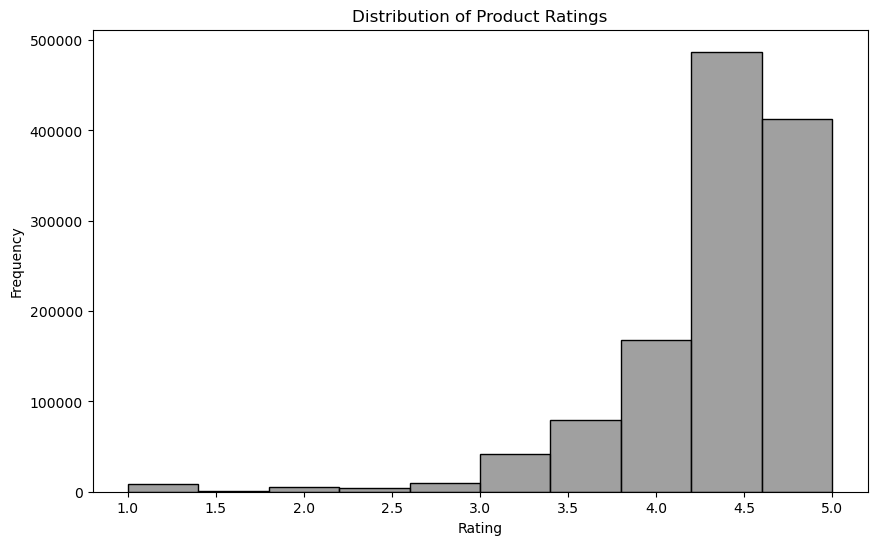

In [133]:
plt.figure(figsize=(10, 6))
sns.histplot(df_no_zero['stars'], bins=10, color='grey', kde=False, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Is there a specific rating that is more common? 4.5